# Problem Information

#### We are presented with an advertising data of an advertising company that is trying to know if an internet advertisement is clicked on by internet users.

The advertising data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

##### Note: The dataset set is from the linear regression exercise by Jose Portilla. It can be found on https://www.udemy.com/share/101WaU3@t1Dn3NjLD3OchinqvoeiIBfcJqrSgk_DGBpKeOo3z569lG5br-eKlQWdX-7ZroH8/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

In [2]:
advert = pd.read_csv("advertising.csv")

In [3]:
#Always important to check the columns contained in the data and their corresponding values

advert.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
#we could already get an insight into whether or not there are null values within the dataset

advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
advert.describe()

#a more numerical insight into the features and label could already tell us the average number of times ads were clicked, and corresponding averages of features that constitute to that

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### Some Data Analysis won't hurt!

In [6]:
advert.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Count'>

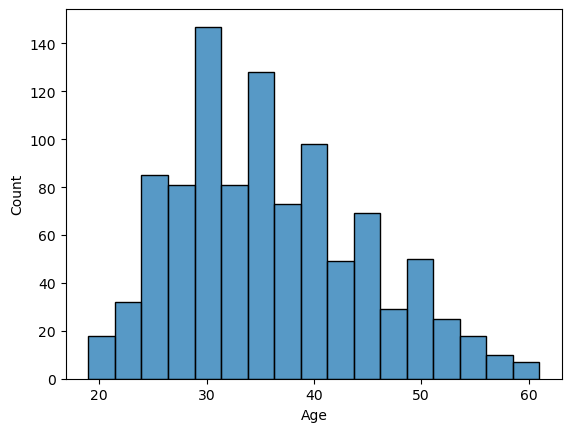

In [7]:
#What is the demography of people that get to see these ads? Are they Gen Zs?

sns.histplot(x = "Age", data = advert)

**Create a jointplot showing Area Income versus Age.**

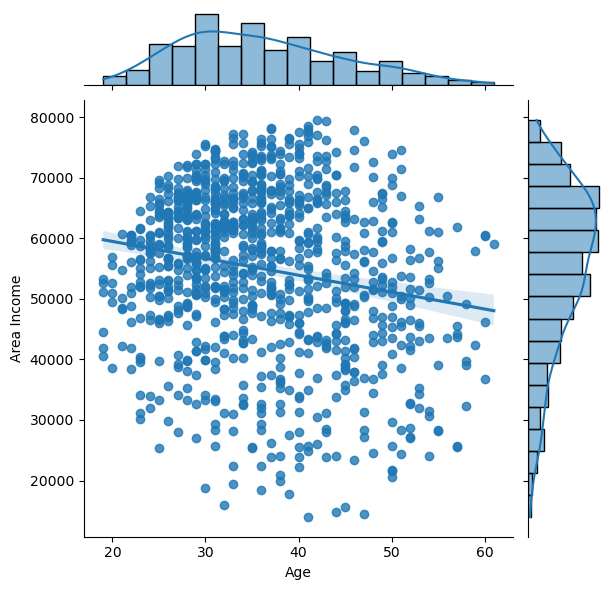

In [8]:
#In comparison with the age, what is the earning power of the people that gets access to these ads?

sns.jointplot(x = "Age", y = "Area Income", data = advert, kind = "reg")

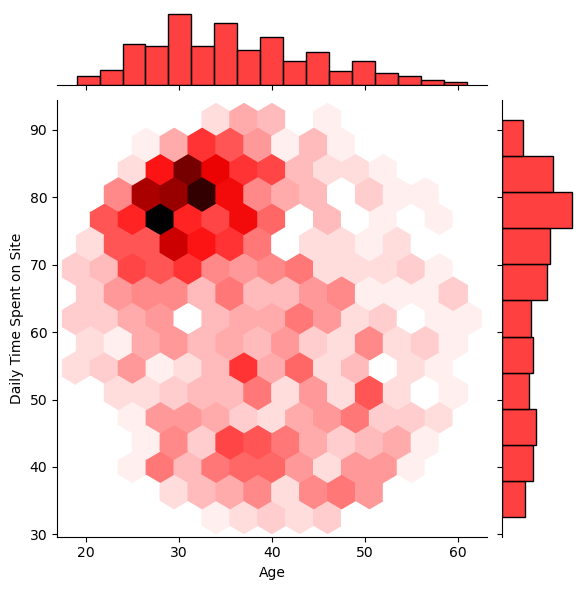

In [9]:
#Also in relation to the age demography, how much of time were spent by users on the company's advertising website

sns.jointplot(x = "Age", y = "Daily Time Spent on Site", data = advert, kind = "hex", color = "red")

#The company can already take clue from this if there could be need to device means to make certain interested age demography of people visit the advertising website

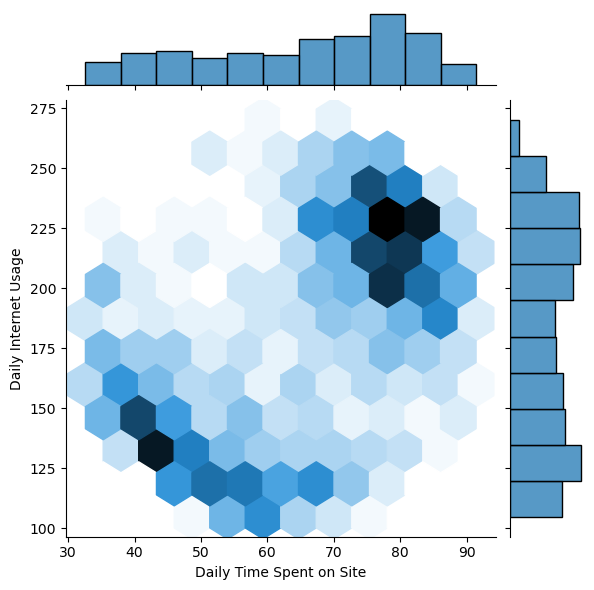

In [10]:
#Is there a foundational problem with general usage of the internet or do people actually use the internet well enough but decide not to visit the company's website?

sns.jointplot(x = "Daily Time Spent on Site", y = "Daily Internet Usage", data = advert, kind = "hex")

##### It is interesting  to see that the company's website actualy gains so much traction from internet users, as they tend to spend more time on the company's website with increasing internet usage

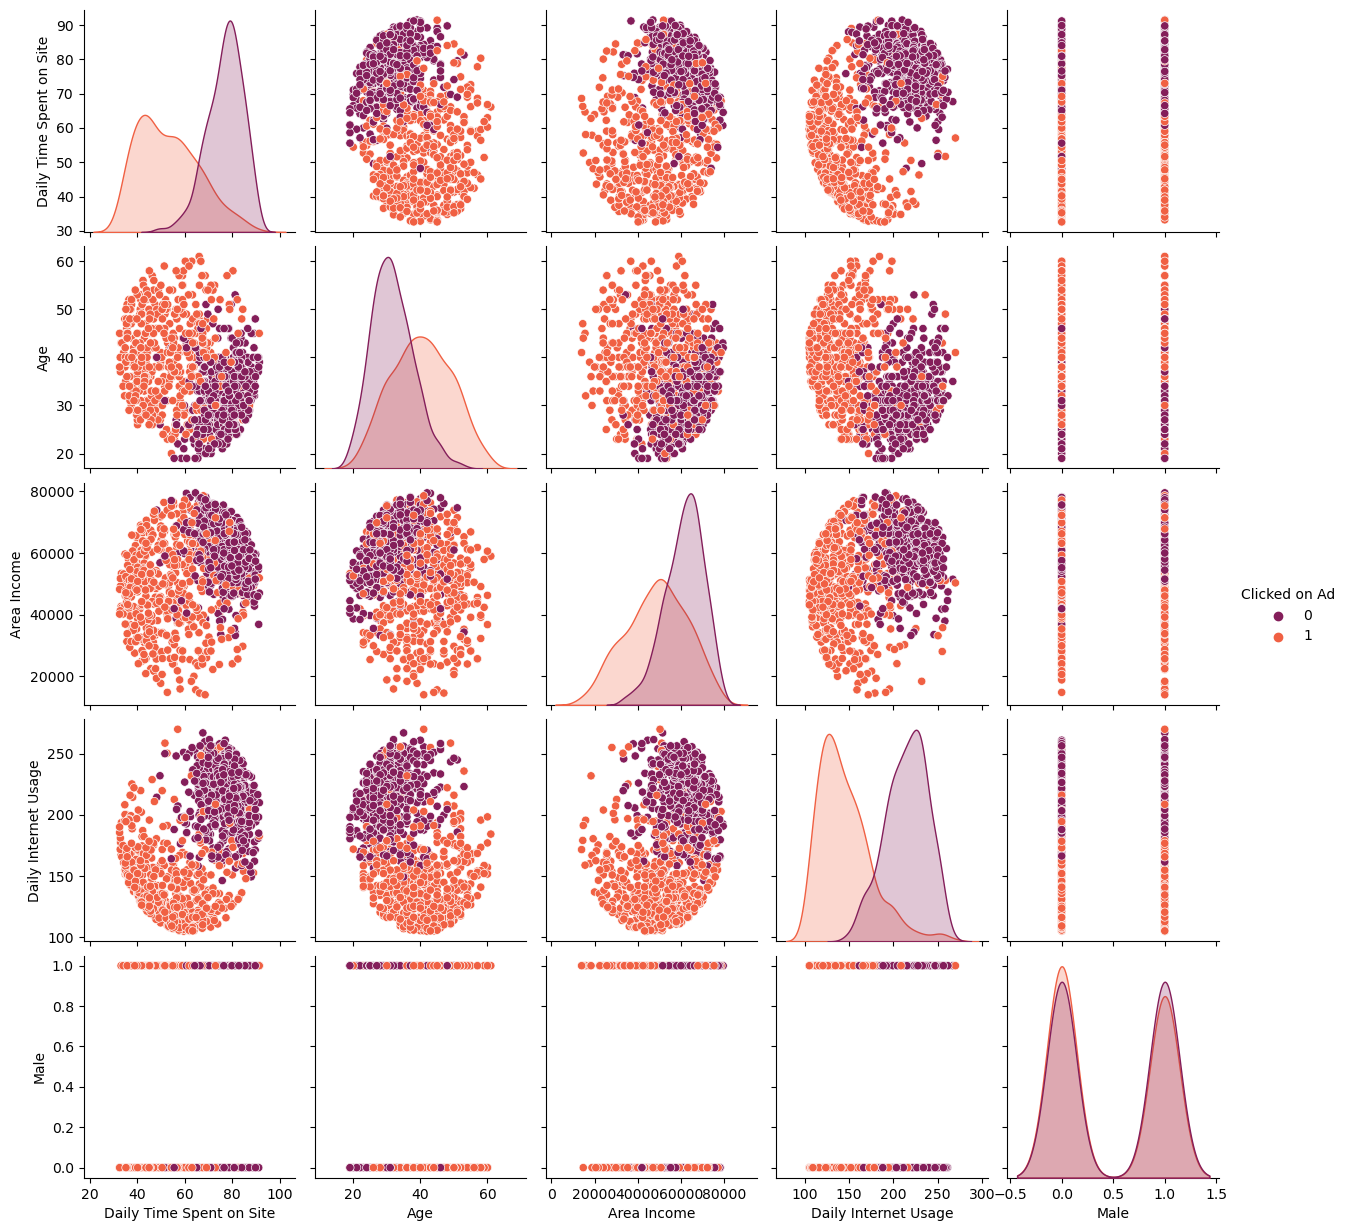

In [11]:
#Let's do a general relation of all available features, based on the likelihood to click the company's ads

sns.pairplot(data =  advert, hue = "Clicked on Ad", palette = "rocket")

### Buiding our Model

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
advert.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [14]:
advert.select_dtypes(include = "object").columns

Index(['Ad Topic Line', 'City', 'Country', 'Timestamp'], dtype='object')

In [15]:
advert.drop(["Ad Topic Line", "Country", "City", "Timestamp"], axis = 1, inplace = True)

In [16]:
X = advert.drop("Clicked on Ad", axis = 1)

y = advert["Clicked on Ad"]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log_model = LogisticRegression()

In [20]:
log_model.fit(X_train, y_train)

LogisticRegression()

In [21]:
predictions = log_model.predict(X_test)

In [22]:
len(predictions)

300

In [23]:
len(y_test)

300

### Evaluating our Model

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [25]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [26]:
print(confusion_matrix(y_test, predictions))

[[149   8]
 [ 14 129]]


In [27]:
#Let's compare our model predictions with the original y_test(clicking of Ad) values


compare = {"original": y_test, "model": predictions}
check = pd.DataFrame(data = compare)

In [28]:
check.head(10)

,original,model
545,1,1
298,0,0
109,0,0
837,1,1
194,0,0
605,1,1
246,1,1
693,1,1
802,1,1
406,1,1


#### Given a new target user, with available information as the features that were modeled, the advertising company can already tell if he/she will click the advertisement ad or not